In [105]:
import matplotlib.pyplot as plt
import numpy as np 

# Zadanie 1

Generowanie danych

In [106]:
N = 100
x1 = np.random.rand(N, 1)
y1 = 3 * x1 + 2* np.random.rand(N, 1)

Text(0, 0.5, 'y')

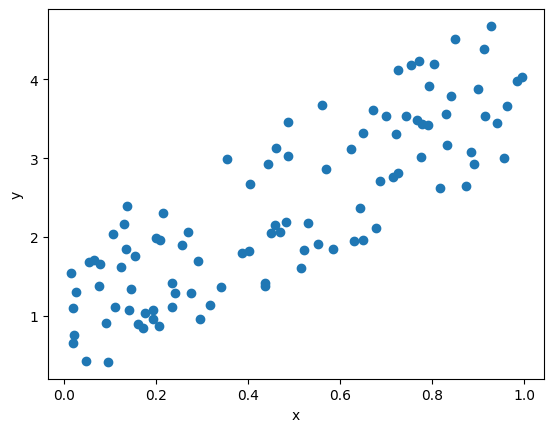

In [107]:
plt.scatter(x1,y1)
plt.xlabel('x')
plt.ylabel('y')

Model i dobranie parametrów

Użycie gotowego wzoru

In [108]:
X = np.hstack((x1, np.ones_like(x1)))

In [109]:
def model(X, t):
     return X.dot(t)


In [110]:
# do optymalzacji używam wzoru na thete z min square 
def wsp(X, y):
     w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
     return w

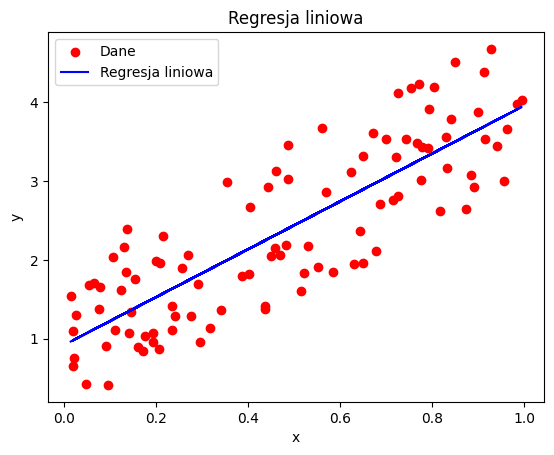

In [111]:
plt.scatter(x1, y1, label='Dane', color='red')
plt.plot(x1, model(X, wsp(X, y1)), color='blue', label='Regresja liniowa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja liniowa')
plt.legend()
plt.show()

GRADIENT I ESTYMACJA

In [112]:
def model_regression(x, a, b):
     return a * x + b

In [113]:
def mean_square(y_pred, y):
     e = (y - y_pred)**2
     return np.sum(e)/len(y)

In [114]:
def compute_cost(x,y,a,b):
    y_pred = model_regression(x, a, b)
    return mean_square(y_pred, y)

In [115]:
def compute_gradient(x, y, a, b):
     y_pred = model_regression(x, a, b)
     n = len(x)
     error = y - y_pred
     da = (-2/n)  * np.sum(x.T.dot(error))
     db = (-2/n)  * np.sum(error)
     return da, db

In [116]:
def step_gradient(data_x, data_y, a_current, b_current, alpha):
    a_gradient, b_gradient = compute_gradient(data_x, data_y, a_current, b_current)

    a_update = a_current - alpha*a_gradient
    b_update = b_current - alpha*b_gradient

    return a_update, b_update

In [117]:
def gradient_descent(data_x, data_y, a_init, b_init, alpha, num_epochs):

    a = a_init
    b = b_init

    cost_history = []

    a_history = []
    b_history = []

    for i in range(num_epochs):
        cost_history.append(compute_cost(data_x, data_y, a, b))
        a, b = step_gradient(data_x, data_y, a, b, alpha)
        a_history.append(a)
        b_history.append(b)
    
    return cost_history, a_history, b_history

In [118]:
num_epochs = 30
a1, b1 = 1, 1
learning_rate = 0.1
cost_history, a_history, b_history = gradient_descent(
    x1, y1, a_init=a1, b_init=b1, alpha=learning_rate, num_epochs=num_epochs
)
a_new, b_new = a_history[-1], b_history[-1]
print(compute_cost(x1, y1, a_new, b_new))

0.44668453234002714


In [119]:
import plotly.express as px
fig = px.line(x=list(range(num_epochs)), y=cost_history)
fig.update_layout(xaxis_title='nr epoki', yaxis_title='MSE')
fig

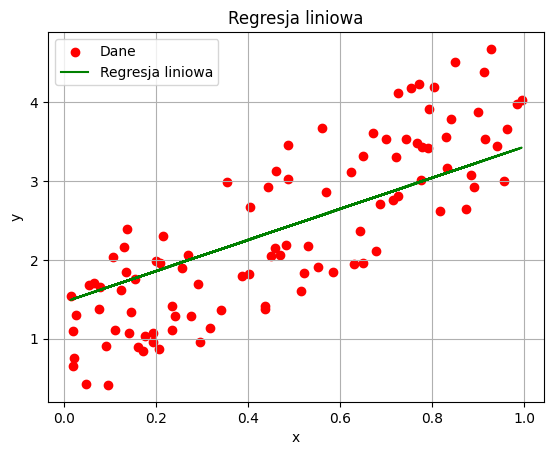

In [120]:
plt.scatter(x1, y1, label='Dane', color='red')
plt.plot(x1, model_regression(x1, a_new, b_new), color='green', label='Regresja liniowa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja liniowa')
plt.legend()
plt.grid(True)
plt.show()

# 2 zadanie

Generowanie danych

In [121]:
x2 = np.random.rand(N, 1)
y2 = 10*(x2**2)-4*x2+2*np.random.rand(N, 1)

Text(0, 0.5, 'y')

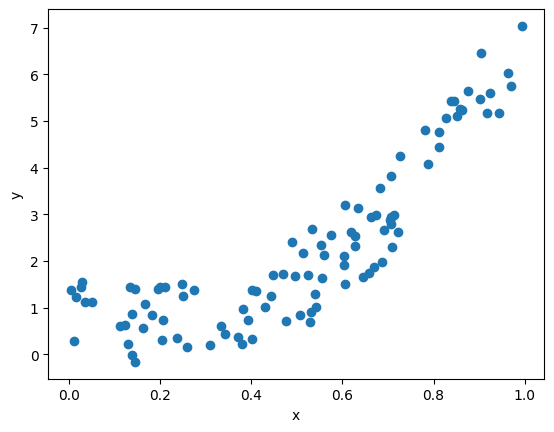

In [122]:
plt.scatter(x2, y2)
plt.xlabel('x')
plt.ylabel('y')

In [123]:
def model_pol(x, a, b, c):
    return a*(x**2) + b*x + c

In [124]:
def compute_cost_pol(x,y,a,b, c):
    y_pred = model_pol(x, a, b, c)
    return mean_square(y_pred, y)

In [125]:
def compute_gradient_pol(x, y, a, b, c):
     y_pred = model_pol(x, a, b, c)
     n = len(x)
     error = y - y_pred
     da = (-2/n) * np.sum((x.T ** 2).dot(error))
     db = (-2/n) * np.sum(x.T.dot(error))
     dc = (-2/n) * np.sum(error)
     return da, db, dc

In [126]:
def step_gradient_pol(data_x, data_y, a_current, b_current, c_current,  alpha):
    a_gradient, b_gradient, c_gradient = compute_gradient_pol(data_x, data_y, a_current, b_current, c_current)

    a_update = a_current - alpha*a_gradient
    b_update = b_current - alpha*b_gradient
    c_update = c_current - alpha*c_gradient

    return a_update, b_update, c_update

In [127]:
def gradient_descent_pol(data_x, data_y, a_init, b_init, c_init, alpha, num_epochs):

    a = a_init
    b = b_init
    c = c_init

    cost_history = []

    a_history = []
    b_history = []
    c_history = []

    for i in range(num_epochs):
        cost_history.append(compute_cost_pol(data_x, data_y, a, b, c))
        a, b, c = step_gradient_pol(data_x, data_y, a, b, c, alpha)
        a_history.append(a)
        b_history.append(b)
        c_history.append(c)
    
    return cost_history, a_history, b_history, c_history

In [128]:
num_epochs2 = 20
a2, b2, c2 = 10, 1, 1
learning_rate2 = 0.1
cost_history2, a_history2, b_history2, c_history2 = gradient_descent_pol(
    x2, y2, a_init=a2, b_init=b2, c_init = c2, alpha=learning_rate2, num_epochs=num_epochs2
)
a_new2, b_new2, c_new2 = a_history2[-1], b_history2[-1], c_history2[-1]
print(compute_cost_pol(x2, y2, a_new2, b_new2, c_new2))

0.7461988837309044


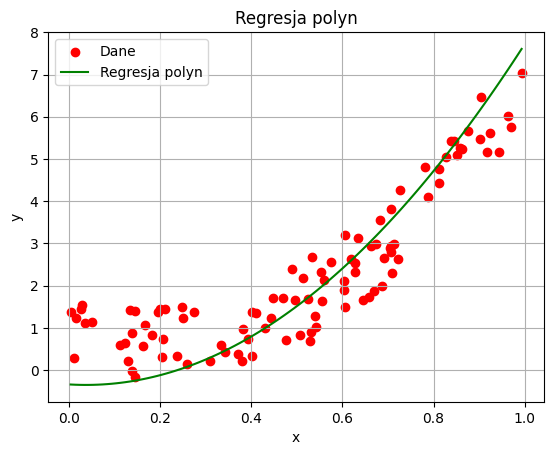

In [129]:
plt.scatter(x2, y2, label='Dane', color='red')
x_values = np.linspace(min(x2), max(x2), 100)
plt.plot(x_values, model_pol(x_values, a_new2, b_new2, c_new2), color='green', label='Regresja polyn')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja polyn')
plt.legend()
plt.grid(True)
plt.show()

In [130]:
print(a_new2, b_new2, c_new2)

8.67663972890529 -0.6267585484523981 -0.33784799850538016


Użycie gotowego wzoru 

In [131]:
X = np.hstack((x2**2, x2, np.ones_like(x1)))
w = wsp(X, y2)

In [132]:
print(w[0], w[1], w[2])

[10.70763688] [-4.91084126] [1.253566]


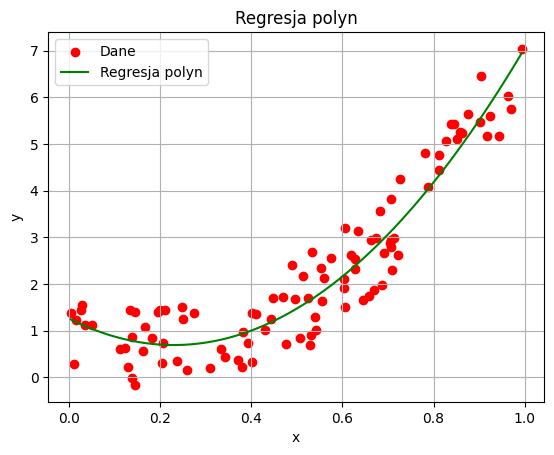

In [133]:
plt.scatter(x2, y2, label='Dane', color='red')
x_values = np.linspace(min(x2), max(x2), 100)
plt.plot(x_values, model_pol(x_values, w[0], w[1], w[2]), color='green', label='Regresja polyn')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja polyn')
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 3

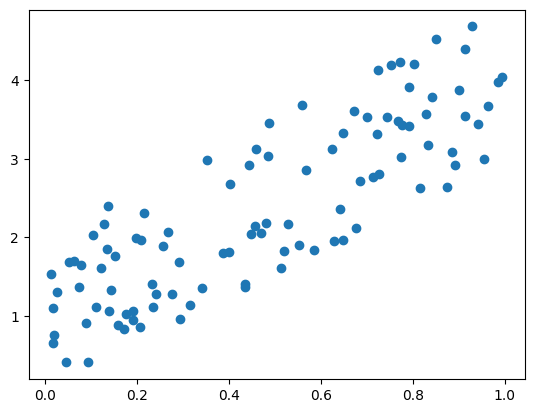

In [134]:
plt.scatter(x1, y1)

In [135]:
def mse_with_l2(a, b, x, y, beta):
    m = len(y)
    y_pred = model_regression(x, a, b)
    error = (y - y_pred) ** 2
    cost = 1/m * np.sum(error) + beta * (a**2 + b**2)
    return cost

def gradient_with_l2(a, b, x, y, beta):
    m = len(y)
    y_pred = model_regression(x, a, b)
    error = y - y_pred
    da = (-2)/m * np.sum(x.T.dot(error)) +  2* beta * a
    db = (-2)/m * np.sum(error) +  2* beta * b
    return da, db

def step_gradient_with_l2(data_x, data_y, a_current, b_current, beta, learning_rate):
    a_gradient, b_gradient = gradient_with_l2(a_current, b_current, data_x, data_y, beta)

    a_update = a_current - learning_rate*a_gradient
    b_update = b_current - learning_rate*b_gradient

    return a_update, b_update

def gradient_descent_with_l2(data_x, data_y, a_init, b_init, learning_rate, num_epochs, beta):

    a = a_init
    b = b_init

    cost_history = []

    a_history = []
    b_history = []

    for i in range(num_epochs):
        cost_history.append(mse_with_l2(a, b, data_x, data_y, beta))
        a, b = step_gradient_with_l2(data_x, data_y, a, b, beta, learning_rate)
        a_history.append(a)
        b_history.append(b)
    
    return cost_history, a_history, b_history


In [145]:
num_epochs3 = 50
a3, b3 = 1, 1
learning_rate3 = 0.01
beta = 0.2

cost_history_l2, a_history3, b_history3 = gradient_descent_with_l2(
    x1, y1, a_init=a3, b_init=b3, learning_rate=learning_rate3, num_epochs=num_epochs3, beta=beta)

a_new3, b_new3 = a_history3[-1], b_history3[-1]
print(mse_with_l2(a_new3, b_new3, x1, y1, beta=beta))

1.4839283513057884


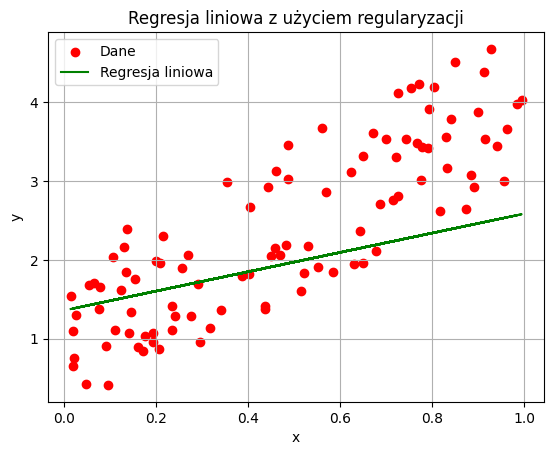

In [146]:
plt.scatter(x1, y1, label='Dane', color='red')
plt.plot(x1, model_regression(x1, a_new3, b_new3), color='green', label='Regresja liniowa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja liniowa z użyciem regularyzacji')
plt.legend()
plt.grid(True)
plt.show()

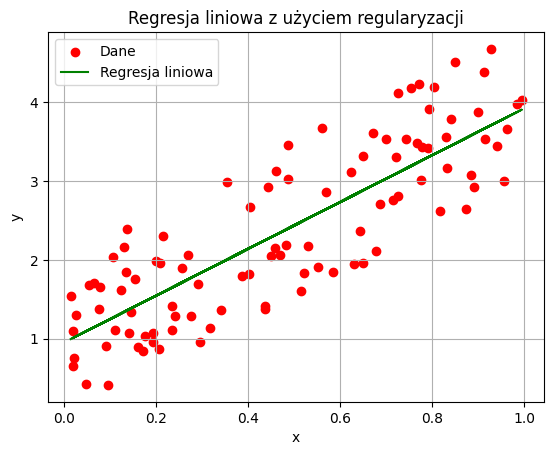

In [138]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.2, max_iter=30)
ridge_model.fit(x1, y1)
plt.scatter(x1, y1, label='Dane', color='red')
plt.plot(x1, ridge_model.predict(x1), color='green', label='Regresja liniowa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja liniowa z użyciem regularyzacji')
plt.legend()
plt.grid(True)
plt.show()


In [139]:
ridge_model.coef_[0][0] # a

2.9731292748577425

In [140]:
ridge_model.intercept_[0] # b

0.9525949587853402

In [141]:
mean_square(ridge_model.predict(x1), y1)

0.3435360611847954